<a href="https://colab.research.google.com/github/MounicaSrinivasan163/Aviation_Dataset/blob/main/Aviation_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Aviation Dataset - Reading , Preprocessing and Stat tests

In [ ]:
import pandas as pd
df = pd.read_csv("/content/airports.csv")
df

,AirportName,IATA,ICAO,TimeZone,City_Name,City_IATA,UTC_Offset_Hours,UTC_Offset_Seconds,Country_CodeA2,Country_CodeA3,Country_Name,GeoPointLat,GeoPointLong
0,Pilanesberg Intl,NTY,FAPN,Africa/Johannesburg,Sun City,NTY,2.0,7200.0,ZA,ZAF,South Africa,-25.333822,27.173358
1,Clovis Muni,CVN,KCVN,America/Denver,"Clovis, New Mexico",CVN,-6.0,-21600.0,US,USA,United States of America,34.425139,-103.079278
2,Cannon Afb,CVS,KCVS,America/Denver,"Clovis, New Mexico",CVN,-6.0,-21600.0,US,USA,United States of America,34.382775,-103.322147
3,Scammon Bay Airport,SCM,PACM,America/Nome,"Scammon Bay, Alaska",SCM,-8.0,-28800.0,US,USA,United States of America,61.845278,-165.571389
4,Kapit,KPI,NaN,Asia/Kuching,Kapit,KPI,8.0,28800.0,MY,MYS,Malaysia,2.017000,112.950000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6388,Prince Abdul Majeed Airport,ULH,OEAO,Africa/Cairo,AlUla,ULH,3.0,10800.0,SA,SAU,Saudi Arabia,26.479220,38.116890
6389,Yartsevo,YAE,NaN,Asia/Krasnoyarsk,Yartsevo (Krasnoyarsk Krai),YAE,7.0,25200.0,RU,RUS,Russian Federation,60.251752,90.204909
6390,JIANSANJIANG,JSJ,NaN,Asia/Shanghai,Fujin,JSJ,8.0,28800.0,CN,CHN,China,47.110000,132.660278
6391,KALUMBILA,UMB,NaN,Africa/Lusaka,Kalumbila,UMB,2.0,7200.0,ZM,ZMB,Zambia,-12.253580,25.444320


# Data Type Check

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6393 entries, 0 to 6392
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   AirportName         6393 non-null   object 
 1   IATA                6373 non-null   object 
 2   ICAO                5091 non-null   object 
 3   TimeZone            6305 non-null   object 
 4   City_Name           6393 non-null   object 
 5   City_IATA           6331 non-null   object 
 6   UTC_Offset_Hours    6305 non-null   float64
 7   UTC_Offset_Seconds  6305 non-null   float64
 8   Country_CodeA2      6379 non-null   object 
 9   Country_CodeA3      6393 non-null   object 
 10  Country_Name        6393 non-null   object 
 11  GeoPointLat         6393 non-null   float64
 12  GeoPointLong        6393 non-null   float64
dtypes: float64(4), object(9)
memory usage: 649.4+ KB


In [ ]:
print(df.shape)
for i in df.select_dtypes(include="object").columns:
  print(i)
  print(df[i].nunique())


(6393, 13)
AirportName
6333
IATA
6373
ICAO
5089
TimeZone
377
City_Name
5698
City_IATA
5702
Country_CodeA2
229
Country_CodeA3
228
Country_Name
230


In [ ]:
print(df.shape)
for i in df.select_dtypes(exclude="object").columns:
  print(i)
  print(df[i].nunique())

(6393, 13)
UTC_Offset_Hours
36
UTC_Offset_Seconds
36
GeoPointLat
6036
GeoPointLong
6048


# Data Preprocessing

In [ ]:
df.isnull().sum()

,0
AirportName,0
IATA,20
ICAO,1302
TimeZone,88
City_Name,0
City_IATA,62
UTC_Offset_Hours,88
UTC_Offset_Seconds,88
Country_CodeA2,14
Country_CodeA3,0


In [ ]:
df.duplicated().sum() #no duplicates found

np.int64(0)

In [ ]:
df["ICAO"].fillna("Unknown",inplace=True)

/tmp/ipython-input-31-591270987.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["ICAO"].fillna("Unknown",inplace=True)


In [ ]:
# Fill missing UTC_Offset_Hours by country-wise average
df['UTC_Offset_Hours'] = df.groupby('Country_Name')['UTC_Offset_Hours'].transform(lambda x: x.fillna(x.mean()))

# Fill missing UTC_Offset_Seconds similarly
df['UTC_Offset_Seconds'] = df.groupby('Country_Name')['UTC_Offset_Seconds'].transform(lambda x: x.fillna(x.mean()))

df['UTC_Offset_Hours'] = df['UTC_Offset_Hours'].round(1)
df['UTC_Offset_Seconds'] = df['UTC_Offset_Seconds'].round()

df

,AirportName,IATA,ICAO,TimeZone,City_Name,City_IATA,UTC_Offset_Hours,UTC_Offset_Seconds,Country_CodeA2,Country_CodeA3,Country_Name,GeoPointLat,GeoPointLong
0,Pilanesberg Intl,NTY,FAPN,Africa/Johannesburg,Sun City,NTY,2.0,7200.0,ZA,ZAF,South Africa,-25.333822,27.173358
1,Clovis Muni,CVN,KCVN,America/Denver,"Clovis, New Mexico",CVN,-6.0,-21600.0,US,USA,United States of America,34.425139,-103.079278
2,Cannon Afb,CVS,KCVS,America/Denver,"Clovis, New Mexico",CVN,-6.0,-21600.0,US,USA,United States of America,34.382775,-103.322147
3,Scammon Bay Airport,SCM,PACM,America/Nome,"Scammon Bay, Alaska",SCM,-8.0,-28800.0,US,USA,United States of America,61.845278,-165.571389
4,Kapit,KPI,Unknown,Asia/Kuching,Kapit,KPI,8.0,28800.0,MY,MYS,Malaysia,2.017000,112.950000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6388,Prince Abdul Majeed Airport,ULH,OEAO,Africa/Cairo,AlUla,ULH,3.0,10800.0,SA,SAU,Saudi Arabia,26.479220,38.116890
6389,Yartsevo,YAE,Unknown,Asia/Krasnoyarsk,Yartsevo (Krasnoyarsk Krai),YAE,7.0,25200.0,RU,RUS,Russian Federation,60.251752,90.204909
6390,JIANSANJIANG,JSJ,Unknown,Asia/Shanghai,Fujin,JSJ,8.0,28800.0,CN,CHN,China,47.110000,132.660278
6391,KALUMBILA,UMB,Unknown,Africa/Lusaka,Kalumbila,UMB,2.0,7200.0,ZM,ZMB,Zambia,-12.253580,25.444320


In [ ]:
df.isnull().sum()

,0
AirportName,0
IATA,0
ICAO,0
TimeZone,0
City_Name,0
City_IATA,0
UTC_Offset_Hours,0
UTC_Offset_Seconds,0
Country_CodeA2,0
Country_CodeA3,0


In [ ]:
df.dropna(subset=["IATA", "Country_CodeA2","City_IATA"], inplace=True)

In [ ]:
# Fill using Country_Name
tz_map = df.dropna(subset=["Country_Name", "TimeZone"]).drop_duplicates("Country_Name").set_index("Country_Name")["TimeZone"].to_dict()
df["TimeZone"] = df.apply(
    lambda row: tz_map.get(row["Country_Name"], "UTC") if pd.isna(row["TimeZone"]) else row["TimeZone"],
    axis=1
)


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6313 entries, 0 to 6391
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   AirportName         6313 non-null   object 
 1   IATA                6313 non-null   object 
 2   ICAO                6313 non-null   object 
 3   TimeZone            6313 non-null   object 
 4   City_Name           6313 non-null   object 
 5   City_IATA           6313 non-null   object 
 6   UTC_Offset_Hours    6313 non-null   float64
 7   UTC_Offset_Seconds  6313 non-null   float64
 8   Country_CodeA2      6313 non-null   object 
 9   Country_CodeA3      6313 non-null   object 
 10  Country_Name        6313 non-null   object 
 11  GeoPointLat         6313 non-null   float64
 12  GeoPointLong        6313 non-null   float64
dtypes: float64(4), object(9)
memory usage: 690.5+ KB


In [ ]:
from sklearn.preprocessing import OrdinalEncoder

oe=OrdinalEncoder()
for i in df.select_dtypes(include="object").columns:
  df[i]=oe.fit_transform(df[[i]])
df

,AirportName,IATA,ICAO,TimeZone,City_Name,City_IATA,UTC_Offset_Hours,UTC_Offset_Seconds,Country_CodeA2,Country_CodeA3,Country_Name,GeoPointLat,GeoPointLong
0,4349.0,3627.0,933.0,24.0,4812.0,3327.0,2.0,7200.0,226.0,224.0,188.0,-25.333822,27.173358
1,1169.0,1068.0,1537.0,91.0,1035.0,1005.0,-6.0,-21600.0,213.0,213.0,217.0,34.425139,-103.079278
2,904.0,1070.0,1538.0,91.0,1035.0,1005.0,-6.0,-21600.0,213.0,213.0,217.0,34.382775,-103.322147
3,4995.0,4524.0,3215.0,138.0,4541.0,4145.0,-8.0,-28800.0,213.0,213.0,217.0,61.845278,-165.571389
4,2625.0,2577.0,4300.0,220.0,2293.0,2361.0,8.0,28800.0,145.0,143.0,125.0,2.017000,112.950000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6387,6186.0,5945.0,4300.0,193.0,5587.0,5393.0,8.0,28800.0,43.0,38.0,41.0,22.438056,110.120833
6388,4490.0,5306.0,3051.0,12.0,88.0,4865.0,3.0,10800.0,178.0,175.0,178.0,26.479220,38.116890
6389,6142.0,5784.0,4300.0,218.0,5554.0,5249.0,7.0,25200.0,176.0,173.0,170.0,60.251752,90.204909
6390,2448.0,2350.0,4300.0,242.0,1601.0,2147.0,8.0,28800.0,43.0,38.0,41.0,47.110000,132.660278


# Correlation Analysis

In [ ]:
df.corr()

,AirportName,IATA,ICAO,TimeZone,City_Name,City_IATA,UTC_Offset_Hours,UTC_Offset_Seconds,Country_CodeA2,Country_CodeA3,Country_Name,GeoPointLat,GeoPointLong
AirportName,1.000000,0.500500,0.029452,0.048253,0.686717,0.511187,0.050718,0.050715,0.012148,0.012969,0.002488,0.016321,0.043432
IATA,0.500500,1.000000,-0.040851,0.062683,0.647419,0.908469,-0.047250,-0.047252,-0.136814,-0.135772,-0.121047,0.083012,-0.057000
ICAO,0.029452,-0.040851,1.000000,0.193889,0.061335,-0.072307,0.330354,0.330312,-0.078549,-0.085180,-0.075960,-0.315687,0.356705
TimeZone,0.048253,0.062683,0.193889,1.000000,0.044930,0.034382,0.577934,0.577943,-0.181988,-0.179775,-0.142880,0.043219,0.509780
City_Name,0.686717,0.647419,0.061335,0.044930,1.000000,0.717761,0.021509,0.021515,0.012361,0.012377,0.006116,0.002429,0.021863
City_IATA,0.511187,0.908469,-0.072307,0.034382,0.717761,1.000000,-0.054973,-0.054978,-0.113444,-0.112821,-0.114109,0.072124,-0.054310
UTC_Offset_Hours,0.050718,-0.047250,0.330354,0.577934,0.021509,-0.054973,1.000000,1.000000,-0.244177,-0.247576,-0.240532,-0.278610,0.924120
UTC_Offset_Seconds,0.050715,-0.047252,0.330312,0.577943,0.021515,-0.054978,1.000000,1.000000,-0.244188,-0.247588,-0.240535,-0.278617,0.924115
Country_CodeA2,0.012148,-0.136814,-0.078549,-0.181988,0.012361,-0.113444,-0.244177,-0.244188,1.000000,0.998319,0.948544,0.227787,-0.242575
Country_CodeA3,0.012969,-0.135772,-0.085180,-0.179775,0.012377,-0.112821,-0.247576,-0.247588,0.998319,1.000000,0.949283,0.230558,-0.246650


In [ ]:
#INFERENCE:
 All the columns show some significance in correalation analysis

# Statistical Analysis

In [ ]:
from scipy import stats

In [ ]:
continuous = ['UTC_Offset_Hours', 'UTC_Offset_Seconds','GeoPointLat', 'GeoPointLong']

categories=['AirportName', 'IATA', 'ICAO', 'TimeZone', 'City_Name', 'City_IATA',
        'Country_CodeA2','Country_CodeA3', 'Country_Name']

In [ ]:
#TWO SAMPLE T - TEST : continious vs continious
def two_sample(d1,d2):
  t=0
  f=0
  for i in  range(31):
    sample1=d1.sample(frac=0.03)
    sample2=d2.sample(frac=0.03)
    t_test,p_value=stats.ttest_ind(sample1,sample2)
    if p_value < 0.05:
      f=f+1
    else:
      t=t+1
  if t>f:
    return True
  else:
    return False


In [ ]:
#CHI-SQUARE TEST - category vs category
def chisquare_cat_vs_cat(d1,d2):
    return True if stats.chi2_contingency(pd.crosstab(d1,d2))[1] < 0.05 else False

In [ ]:
#ANNOVA TEST - continious vs category
def annova_test(d1,d2):
    group= df[d2].unique()
    data = {}
    for i in group:
        data[i]=df[d1][df[d2]==i]
    f_value,p_value=stats.f_oneway(*[i for i in data.values()])
    return False if p_value < 0.05 else True

In [ ]:
#All the statistical test being done across all the columns
final = {}
for i in df.columns:
    final[i]={}
    for j in df.columns:
        if (i in continuous) and (j in continuous):
            result=two_sample(df[i],df[j])
        elif (i in continuous) and (j in categories):
            result=annova_test(i,j)
        elif (i in categories) and (j in continuous):
            result=annova_test(j,i)
        elif (i in categories) and (j in categories):
            result=chisquare_cat_vs_cat(df[i],df[j])
        if result:
            final[i][j]=1
        else:
            final[i][j]=0

/usr/local/lib/python3.11/dist-packages/scipy/stats/_axis_nan_policy.py:580: SmallSampleWarning: all input arrays have length 1.  f_oneway requires that at least one input has length greater than 1.
  if is_too_small(samples, kwds):
/tmp/ipython-input-52-2995646634.py:7: SmallSampleWarning: One or more sample arguments is too small; all returned values will be NaN. See documentation for sample size requirements.
  f_value,p_value=stats.f_oneway(*[i for i in data.values()])
/usr/local/lib/python3.11/dist-packages/scipy/stats/_axis_nan_policy.py:580: SmallSampleWarning: all input arrays have length 1.  f_oneway requires that at least one input has length greater than 1.
  if is_too_small(samples, kwds):
/tmp/ipython-input-52-2995646634.py:7: SmallSampleWarning: One or more sample arguments is too small; all returned values will be NaN. See documentation for sample size requirements.
  f_value,p_value=stats.f_oneway(*[i for i in data.values()])
/usr/local/lib/python3.11/dist-packages/scip

In [ ]:
#The result of the statistical test which was in a dictionary is put into a dataframe
final_df = pd.DataFrame(final)
final_df

,AirportName,IATA,ICAO,TimeZone,City_Name,City_IATA,UTC_Offset_Hours,UTC_Offset_Seconds,Country_CodeA2,Country_CodeA3,Country_Name,GeoPointLat,GeoPointLong
AirportName,1,0,1,0,1,1,0,0,1,1,1,0,0
IATA,0,0,0,0,0,0,1,1,0,0,0,1,1
ICAO,1,0,1,1,1,1,1,1,1,1,1,1,0
TimeZone,0,0,1,1,1,1,0,0,1,1,1,0,0
City_Name,1,0,1,1,1,1,0,0,1,1,1,0,0
City_IATA,1,0,1,1,1,1,0,0,1,1,1,0,0
UTC_Offset_Hours,0,1,1,0,0,0,1,1,0,0,0,0,1
UTC_Offset_Seconds,0,1,1,0,0,0,0,1,0,0,0,1,1
Country_CodeA2,1,0,1,1,1,1,0,0,1,1,1,0,0
Country_CodeA3,1,0,1,1,1,1,0,0,1,1,1,0,0


<Axes: >

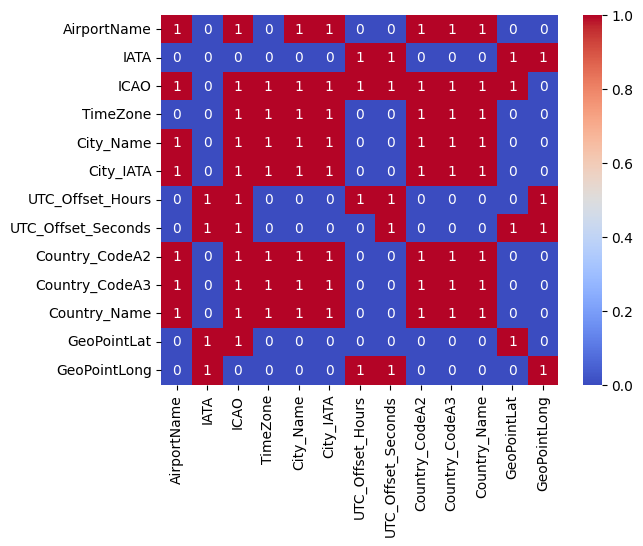

In [ ]:
import seaborn as sns
#heatmap analysis for better visualisation of the stastical test results
sns.heatmap(final_df,annot=True,cmap="coolwarm")

In [ ]:
#INFERENCE :
#all the columns shows some significance hence we go ahead with ML/DL